# 🚀 Exploration des données : Missions Spatiales (1957+)

Ce notebook propose une analyse exploratoire des missions spatiales à partir des données nettoyées. Objectifs :
- Comprendre les tendances majeures
- Identifier les patterns intéressants
- Guider les prochaines étapes en Data Science / ML

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_cleaning import load_and_clean_data
from src.analysis import *
from src.visualizations import *

sns.set(style="whitegrid")

base_path = os.getcwd()
file_path = os.path.join(base_path, "../data", "spaces_missions.csv")
df = load_and_clean_data(file_path)
df.head()

,organisation,location,date,detail,rocket_status,price,mission_status
0,spacex,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,casc,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,spacex,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ula,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [4]:
df.info()
df.describe(include='all')
df.nunique()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   organisation    4324 non-null   object             
 1   location        4324 non-null   object             
 2   date            4198 non-null   datetime64[ns, UTC]
 3   detail          4324 non-null   object             
 4   rocket_status   4324 non-null   object             
 5   price           4324 non-null   float64            
 6   mission_status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


organisation        0
location            0
date              126
detail              0
rocket_status       0
price               0
mission_status      0
dtype: int64

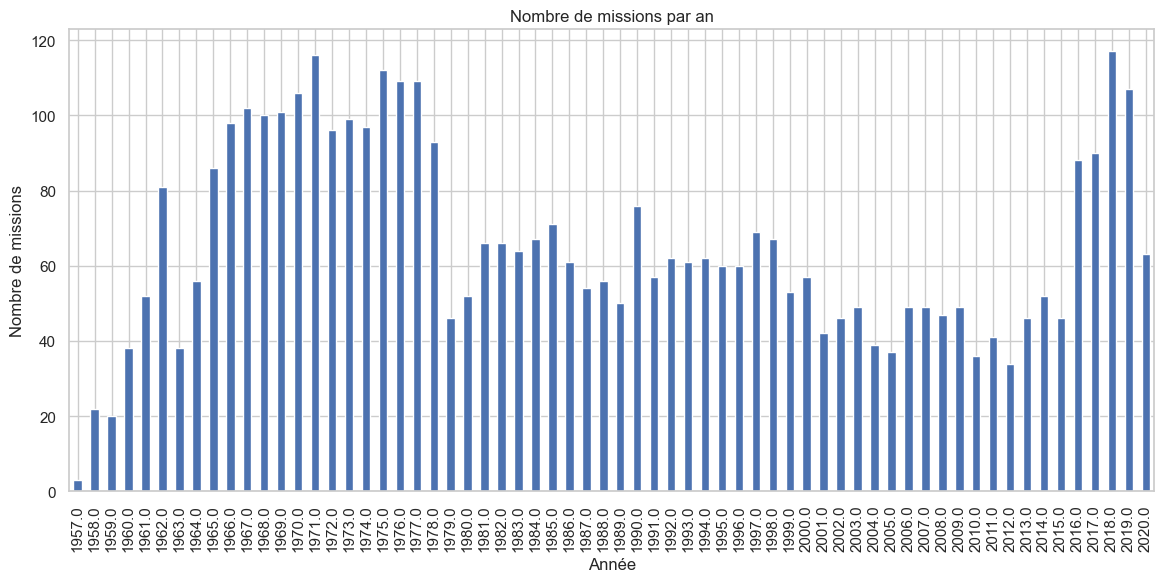

In [5]:
df['year'] = df['date'].dt.year

missions_per_year = df['year'].value_counts().sort_index()
missions_per_year.plot(kind="bar", figsize=(14, 6), title="Nombre de missions par an")
plt.xlabel("Année")
plt.ylabel("Nombre de missions")
plt.show()

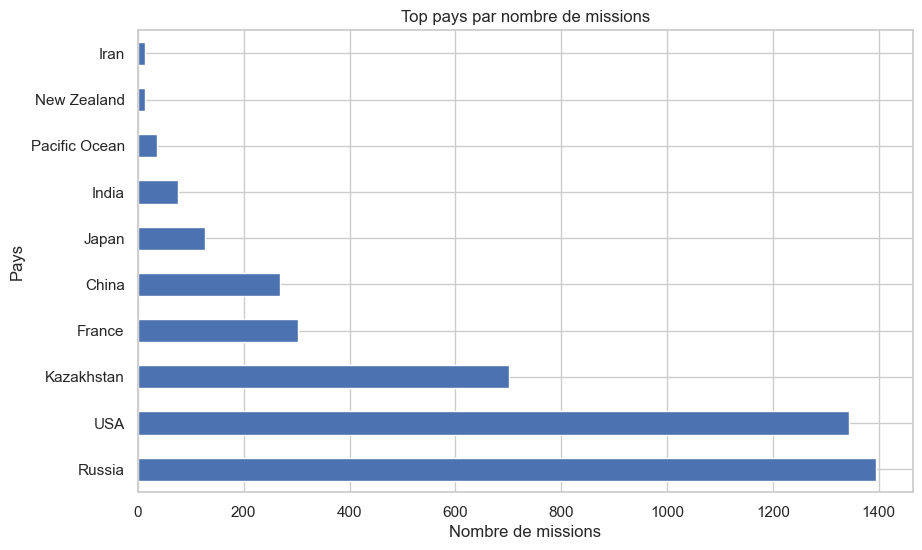

In [6]:
countries = missions_per_country(df)
countries.head(10).plot(kind="barh", title="Top pays par nombre de missions", figsize=(10, 6))
plt.xlabel("Nombre de missions")
plt.ylabel("Pays")
plt.show()

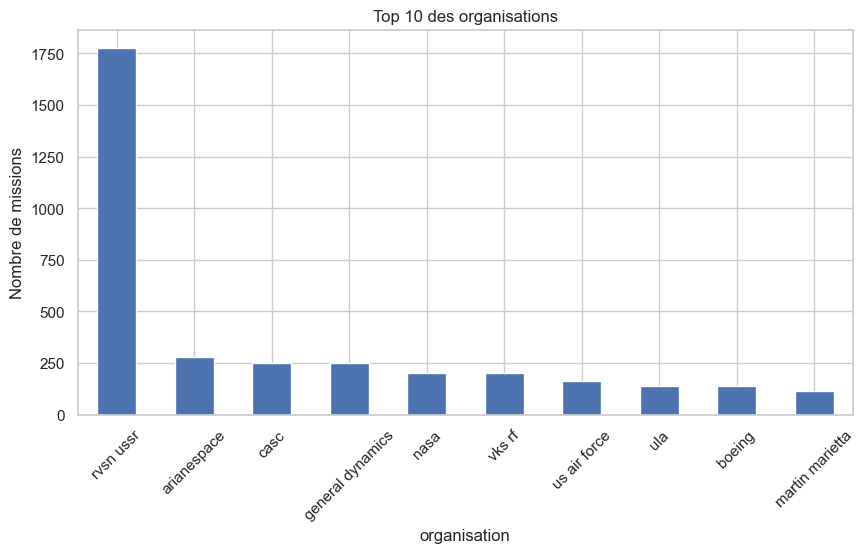

In [7]:
df['organisation'].value_counts().head(10).plot(kind="bar", title="Top 10 des organisations", figsize=(10, 5))
plt.ylabel("Nombre de missions")
plt.xticks(rotation=45)
plt.show()

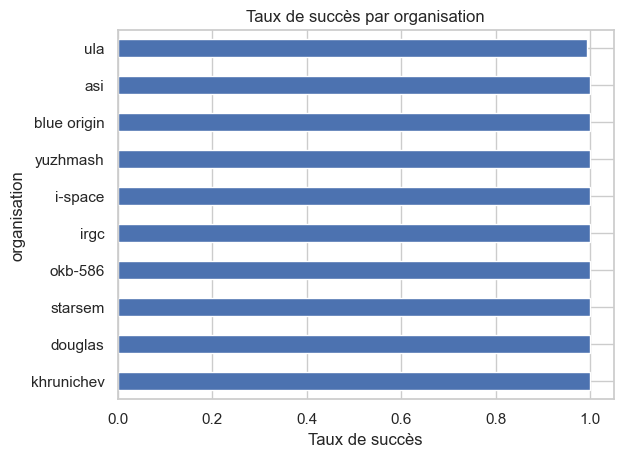

In [8]:
df['success'] = df['mission_status'].str.lower().str.contains("success")
success_rate_by_organisation(df).head(10).plot(kind="barh", title="Taux de succès par organisation")
plt.xlabel("Taux de succès")
plt.show()

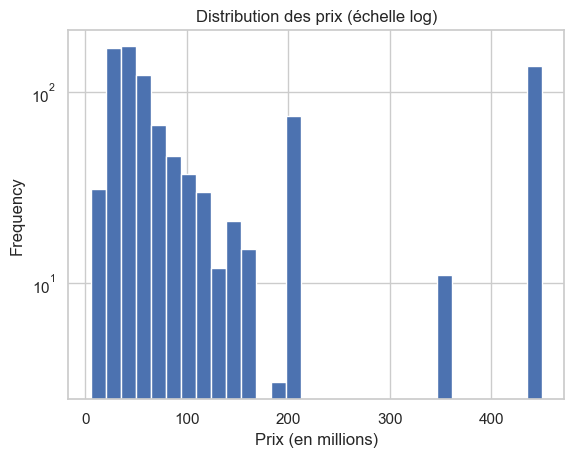

In [9]:
df[df['price'] > 0]['price'].plot(kind="hist", bins=30, log=True, title="Distribution des prix (échelle log)")
plt.xlabel("Prix (en millions)")
plt.show()